# Convolutional Neural Networks

Alipio Jorge

24 May 2021

# Keras Example

- An example with Keras
  - Dataset **MNIST**
      - A classical
      - from Keras datasets
  - Images of digits
      - 28 x 28
  
  
- Objective
  - build a MLP to identify digits from images
  
  
- Steps
  - transform images into vectors (MLP input)
  - define topology of the network
  - choose hyper-parameters
  - fit the network
  - evaluate result


# MNIST in keras

from https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/


- Class distribution
  - Practically uniform


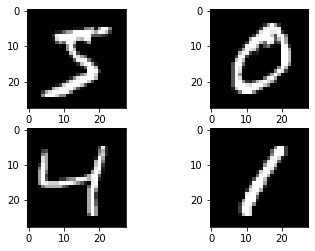

In [58]:
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt

# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Input shape


- Input is a set of images
    - $N$ images
    - $Width \times Height$ image size
    - $k$ **channels**
        - Channels carry color and intensity information, for example
        - Gray scale: 1 channel
        - Color: 3 channels (RGB) or more

In [59]:
# shape of the data as it comes from mnist

X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [60]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# Reshape

- Different methods/layers take different inputs
    - We often have to **reshape**


- **Example**:
    - an image into a vector
    - a vector into an image
    - an image with no channels into an image with one channel
    - etc.

# Apply a multilayer perceptron to MNIST

- We need to **flatten** the images
    - Input examples are **vectors** in MLP
    - We will have 28x28 = 784 **inputs**


- We also **scale** the values
    - from 0->255 to 0->1


In [61]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [62]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(60000, 784)

# One Hot

- Class encoding
  - 10 classes use 10 output neurons
  - **one_hot** unfolding
  - function `to_categorical` from `keras` does it


In [63]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]
y_train.shape

(60000, 10)

# Baseline MLP

- Where the baseline MLP is defined
    - Compile
    - Fit
    - Evaluate on test set
    

- Optimizer
    - Adam
        - very efficient, adaptive, gradient descent

In [64]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [82]:
# build the model
model = baseline_model()

# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
# evaluate returns loss and accuracy
scores = model.evaluate(X_test, y_test, verbose=1)
print("MLP Accuracy: %.3f" % (scores[1]))

Epoch 1/10
300/300 - 2s - loss: 0.2757 - accuracy: 0.9224 - val_loss: 0.1364 - val_accuracy: 0.9592
Epoch 2/10
300/300 - 2s - loss: 0.1089 - accuracy: 0.9683 - val_loss: 0.1001 - val_accuracy: 0.9703
Epoch 3/10
300/300 - 2s - loss: 0.0702 - accuracy: 0.9795 - val_loss: 0.0752 - val_accuracy: 0.9765
Epoch 4/10
300/300 - 1s - loss: 0.0501 - accuracy: 0.9857 - val_loss: 0.0682 - val_accuracy: 0.9792
Epoch 5/10
300/300 - 1s - loss: 0.0357 - accuracy: 0.9901 - val_loss: 0.0619 - val_accuracy: 0.9809
Epoch 6/10
300/300 - 2s - loss: 0.0258 - accuracy: 0.9931 - val_loss: 0.0579 - val_accuracy: 0.9821
Epoch 7/10
300/300 - 2s - loss: 0.0187 - accuracy: 0.9956 - val_loss: 0.0571 - val_accuracy: 0.9823
Epoch 8/10
300/300 - 2s - loss: 0.0140 - accuracy: 0.9969 - val_loss: 0.0607 - val_accuracy: 0.9821
Epoch 9/10
300/300 - 1s - loss: 0.0116 - accuracy: 0.9975 - val_loss: 0.0629 - val_accuracy: 0.9822
Epoch 10/10
300/300 - 1s - loss: 0.0073 - accuracy: 0.9987 - val_loss: 0.0638 - val_accuracy: 0.9814

In [83]:
print("loss =",model.loss)

loss = categorical_crossentropy


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


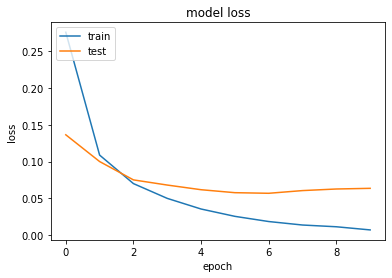

In [84]:
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Fit and evaluate > summary

- **Train**
    - Epochs
    - Loss
        - `categorical_crossentropy`
    - Metric
        - `Accuracy`
    - History
        - `val_loss`


- **Evaluate**
    - On a separate test set
        - same accuracy in val_accuracy if test=val

# Types of Layers

- Types of layers
  - **dense**: the usual fully connected NN hidden layer or output layer
  - **dropout**: a layer that randomly zeroes a fraction of the weights between two layers
      - dropout is a regularization tool
      - reduces number of parameters
      - makes model more robust
      - helps avoiding overfitting
      - not always clear when to be used
  - other types later...


In [86]:
# model with dropout
def MLPdropout():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(rate=0.4))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [87]:
# build the model
model = MLPdropout()

# Fit the model
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
# evaluate returns loss and accuracy
scores = model.evaluate(X_test, y_test, verbose=1)
print("MLP Accuracy: %.3f" % (scores[1]))

Epoch 1/10
300/300 - 3s - loss: 0.3224 - accuracy: 0.9062 - val_loss: 0.1451 - val_accuracy: 0.9576
Epoch 2/10
300/300 - 2s - loss: 0.1418 - accuracy: 0.9591 - val_loss: 0.1023 - val_accuracy: 0.9686
Epoch 3/10
300/300 - 2s - loss: 0.0990 - accuracy: 0.9710 - val_loss: 0.0848 - val_accuracy: 0.9743
Epoch 4/10
300/300 - 2s - loss: 0.0799 - accuracy: 0.9761 - val_loss: 0.0690 - val_accuracy: 0.9799
Epoch 5/10
300/300 - 2s - loss: 0.0641 - accuracy: 0.9807 - val_loss: 0.0637 - val_accuracy: 0.9808
Epoch 6/10
300/300 - 2s - loss: 0.0527 - accuracy: 0.9832 - val_loss: 0.0645 - val_accuracy: 0.9794
Epoch 7/10
300/300 - 2s - loss: 0.0464 - accuracy: 0.9857 - val_loss: 0.0654 - val_accuracy: 0.9792
Epoch 8/10
300/300 - 2s - loss: 0.0391 - accuracy: 0.9876 - val_loss: 0.0605 - val_accuracy: 0.9812
Epoch 9/10
300/300 - 2s - loss: 0.0345 - accuracy: 0.9892 - val_loss: 0.0568 - val_accuracy: 0.9824
Epoch 10/10
300/300 - 2s - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0588 - val_accuracy: 0.9808

# Activation functions

- Relu
- Sigmoid (logistic)
- Tanh
- Softmax
- And other
    - https://keras.io/api/layers/activations/

# Convolutional Neural Networks

- Classical ANN (MLP) have **dense layers**
  - all nodes in a layer are connected to all nodes in the next
  
  
- Other ANN layers may not be dense
  - **Convolutional Neural Networks** (CNN) were introduced by LeCun et al. in 1989
  
  


# Convolutional Neural Networks

- The digit example
  - Images are matrices of pixel intensity values
  - Each image is associated to a digit label (1, 2, 3, ..., 9)
  - Classification should be robust to certain **transformations**
      - translation, resizing, mild warpings
  - MLP can treat this with **many** examples
  - They do not consider **pixel proximity**
      - nearby pixels are more strongly correlated than distant ones


- CNN explore **local features** that are observale in **subregions**


- Local features can be arranged in higher order features in subsequent layers


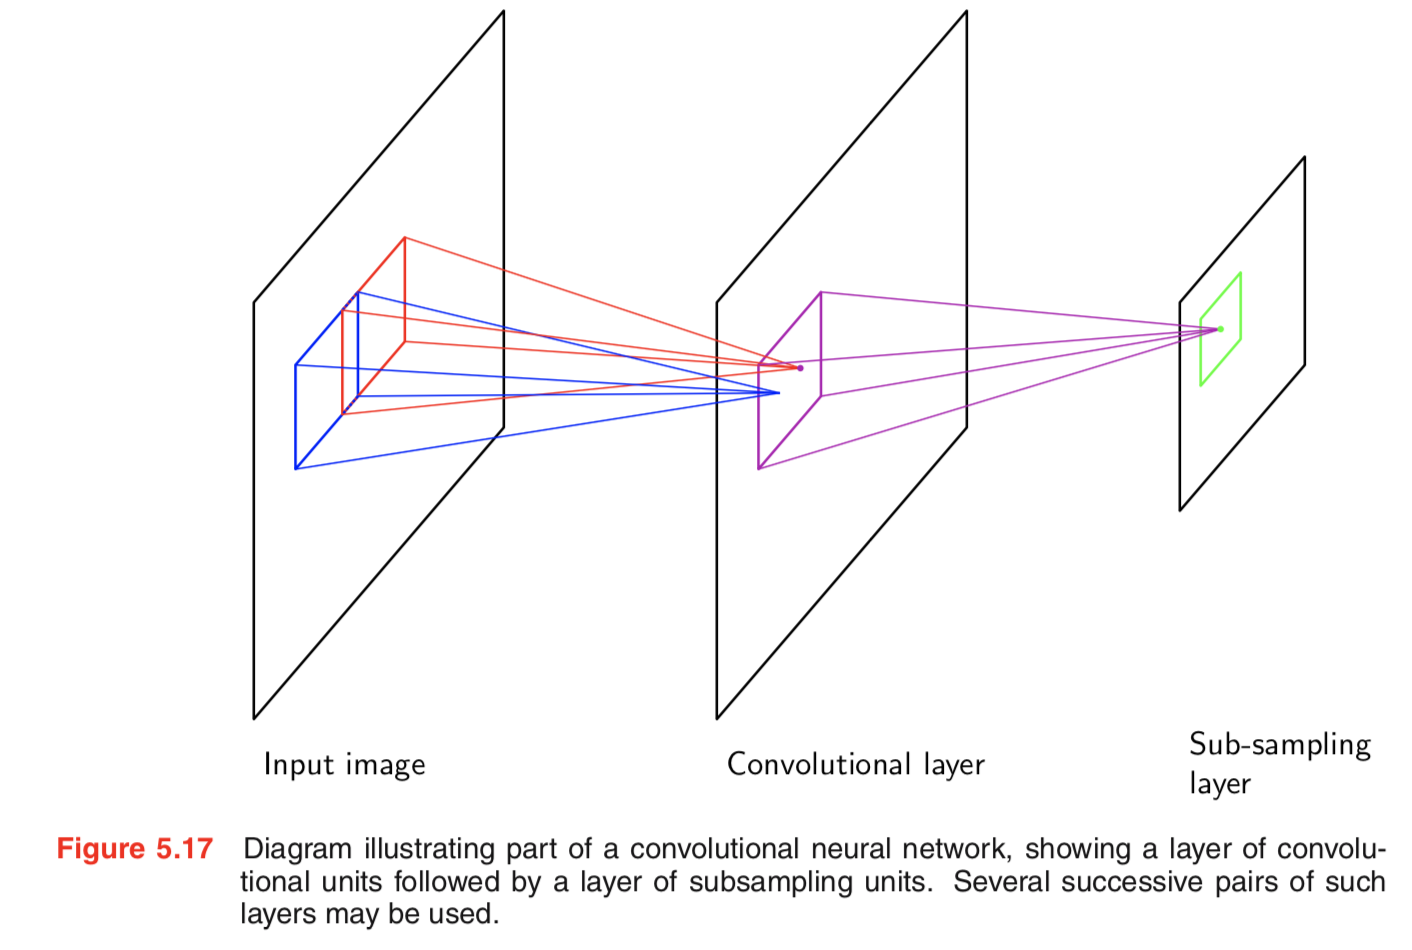

In [88]:
from IPython.display import Image
Image("imagens/12-CNN-figCNNbishop.png")

# Convolutional Neural Networks

- The input image is a rectange of values (may have layers)


- A **convolutional layer**
  - Imagine as if it *scans* the image using a **filter** (or filters)
    - e.g. a filter looking for straight lines
    - the filter is applied to **all possible** subimages of a given dimension
      - the subimage is the **kernel**
    - it starts with the top left corner and keeps shifting right and then down
        - not actually: this is done **simultaneously** for all kernels
    - the amount it shifts is the **stride**
  - each point of the kernel is connected to a node
    - multiple filters connect to different nodes
  - all subimages of the same filter **share the weights**
      - This **reduces** the total number of weights
      - And speeds up learning
  - **padding** is the size of the margin that may fall out of the image
    - in `keras` padding `same` calculates padding to yield the same number of output nodes as input


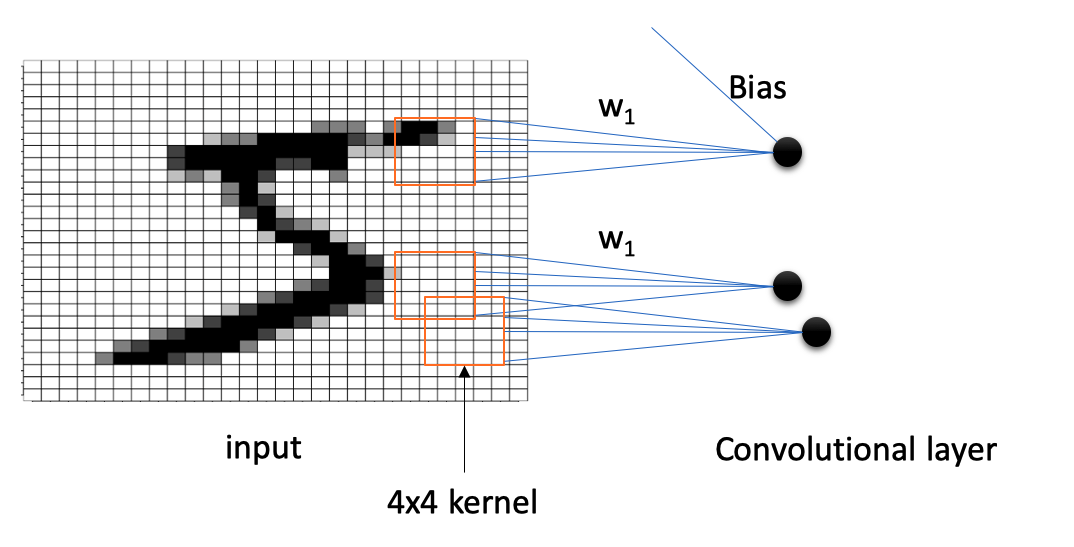

In [90]:
from IPython.display import Image
Image("imagens/12-CNN-Convolutional_layer.png")

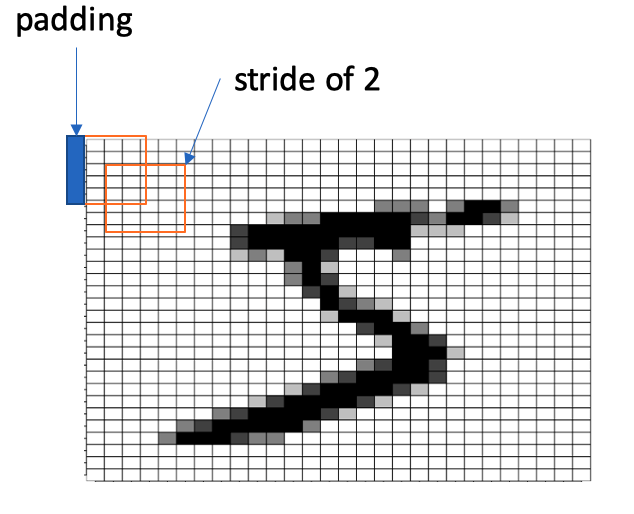

In [91]:
from IPython.display import Image
Image("imagens/12-CNN-Convolutional_layer_stride_and_padding.png")

# CNN 1

- An example

In [92]:
# with some repetitions...

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# Reshape

- Input is now a set of 28x28 images with 1 channel
    - 60000 for train

In [93]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

X_train.shape

(60000, 28, 28, 1)

In [94]:
# rescale inputs from 0-255 to 0-1

X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

y_train.shape

(60000, 10)

In [116]:
def cnn1(n_classes):
    # create model
    model = Sequential()
    model.add(Conv2D(4, (3, 3), input_shape=(28, 28,1), 
                     padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(units=n_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [117]:
# build the model
model = cnn1(n_classes=10)

model.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 4)         40        
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 4)         0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 4)         0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_38 (Dense)             (None, 10)                1290      
Total params: 101,810
Trainable params: 101,810
Non-trainable params: 0
_______________________________________________

In [113]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Accuracy: %.3f%%" % (scores[1]))

Epoch 1/10
300/300 - 7s - loss: 0.4453 - accuracy: 0.8783 - val_loss: 0.1638 - val_accuracy: 0.9503
Epoch 2/10
300/300 - 7s - loss: 0.1762 - accuracy: 0.9477 - val_loss: 0.1066 - val_accuracy: 0.9691
Epoch 3/10
300/300 - 6s - loss: 0.1334 - accuracy: 0.9598 - val_loss: 0.0864 - val_accuracy: 0.9738
Epoch 4/10
300/300 - 6s - loss: 0.1113 - accuracy: 0.9656 - val_loss: 0.0774 - val_accuracy: 0.9764
Epoch 5/10
300/300 - 9s - loss: 0.0961 - accuracy: 0.9705 - val_loss: 0.0695 - val_accuracy: 0.9771
Epoch 6/10
300/300 - 6s - loss: 0.0881 - accuracy: 0.9722 - val_loss: 0.0634 - val_accuracy: 0.9802
Epoch 7/10
300/300 - 6s - loss: 0.0779 - accuracy: 0.9756 - val_loss: 0.0565 - val_accuracy: 0.9823
Epoch 8/10
300/300 - 6s - loss: 0.0699 - accuracy: 0.9779 - val_loss: 0.0551 - val_accuracy: 0.9821
Epoch 9/10
300/300 - 6s - loss: 0.0634 - accuracy: 0.9797 - val_loss: 0.0516 - val_accuracy: 0.9835
Epoch 10/10
300/300 - 6s - loss: 0.0598 - accuracy: 0.9809 - val_loss: 0.0553 - val_accuracy: 0.9829

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


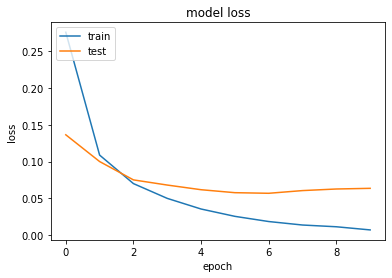

In [84]:
print(history.history.keys())

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Convolutional Neural Networks

- 2D convolutional layer
  - generates a **two dimensional** set of features (a feature map)


- first layer: - **convolutional**
  - 3x3 `kernel` (10 weights, 3x3+1)
  - `strides=1` (each subimage shifts 1)
  - `padding=same` produces image of the same size as original
  - four `filters` per subimage (4x10 weights)
  - output is 28x28x4
- second layer: - **MaxPooling** 2x2
  - Subsamples the 28x28 filtered images into 14x14 ones
  - Chooses **maximum** of each 2x2 square (no strides)
  - zero weights (nothing to learn here)
  - output is 14x14x4
- third layer: - **dropout**
- fourth layer: - **flatten** 
  - 14x14x4 = 784 units
  - nothing to learn here (only reshapes)
- fifth layer is fully connected (**dense**)
  - 128 output nodes, 100480 weight = (784+1)x128
- output layer is **dense**
  - 10 output nodes 
  - 129x10 weights = 1290
  
  
- **Activity**
    - what is the effect in accuracy of taking out each of the layers?

# Convolutional Neural Networks

- The tricks of CNN
  - **local receptive fields** (a node in the hidden layer is connected to a 'rectangle' in the input)
    - *feature map* is the image rectangle, *kernel* is the weight matrix
    - fitting is done by considering all subimages
  - **weight sharing** (weights in the same position for different nodes are entangled)
    - the weights of the same relative position in the subimages are the same
  - **multiple filters**: each filter detects one feature
    - the same subimage is connected to different units in the next layer 
  - **subsampling** the features are subsampled and combined in next layer
  - **final layer** is fully connected


- We can **stack** convolutional layers (and others)


# Activity

- Try different configurations for the CNN
    - did results improve?
- Compare with non ANN methods

# Bibliography

**Keras documentation**
https://keras.io/

**On dropout**
(https://machinelearningmastery.com/how-to-reduce-overfitting-with-dropout-regularization-in-keras/)

**The Elements of Statistical Learning**
Trevor Hastie, Robert Tibshirani, Jerome Friedman
Springer.

**Pattern Recognition And Machine Learning**
Bishop, Springer, 2006 (section 5.5.6)

**Understanding RMSprop — faster neural network learning**
Vitaly Bushaev, Towards Data Science, 2018
https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a

**Gentle Introduction to the Adam Optimization Algorithm for Deep Learning**
Jason Brownlee
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

**A Gentle Introduction to Padding and Stride for Convolutional Neural Networks**
Jason Brownlee 
https://machinelearningmastery.com/padding-and-stride-for-convolutional-neural-networks/
